1. 파이차트 - 가정, 직장, 민간, 국공립 유형 구분
2. 교사 1인당 맡은 아동 수 = 정원수/보육교직원수
3. 행정구역별 어린이집 수 - 지도그래프

# **데이터시각화_과제2_19013227_박민지**

In [ ]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline

#io와 pandas 모듈 import
import io 
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

# 한글 깨짐1
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
data=pd.read_csv("/content/광진구_어린이집_교사당아동수.csv", encoding='CP949')
data.head()


,어린이집명,어린이집유형구분,정원수,보육교직원수,교사당아동수
0,EQ어린이집,가정,20,8,2.50
1,KB구의 어린이집,직장,49,14,3.50
2,강변에코비어린이집,가정,19,5,3.80
3,건대꼬마숲어린이집,민간,48,11,4.36
4,고은아이어린이집,가정,19,9,2.11


#1. 파이차트 - 가정, 직장, 민간, 국공립 유형 구분

In [ ]:
type_ = data.groupby(["어린이집유형구분"]).size()
type_ = type_.sort_values(ascending = False)
df = pd.DataFrame(type_)
df

,0
어린이집유형구분,
국공립,56
민간,55
가정,45
직장,4
협동,1


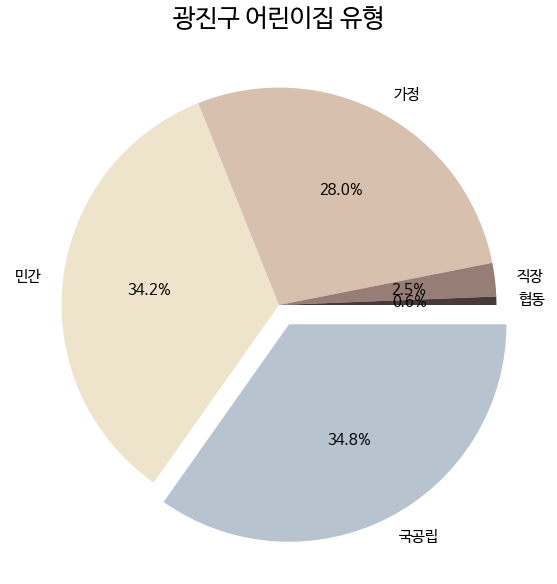

In [ ]:
import matplotlib.pyplot as plt

ratio = type_.values
labels = ["국공립","민간","가정","직장","협동"]

explode = [0.1, 0.0,0.0, 0.0,0.0]
colors = ['#B7C4CF','#EEE3CB','#D7C0AE','#967E76', '#483838' ]

plt.figure(figsize=(10,10))
plt.rc('font', size=15)        # 기본 폰트 크기
#plt.rc('figure', titlesize=150) # figure title 폰트 크기

plt.title('광진구 어린이집 유형',fontsize=25)
plt.pie(ratio,labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode=explode, shadow=False, colors=colors)
plt.show()

#2. 어린이집 유형별 교사 1인당 맡은 아동 수 = 정원수/보육교직원수

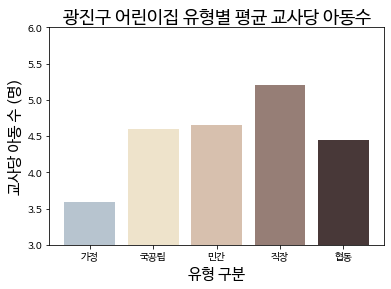

In [ ]:
data=pd.read_csv("/content/광진구_어린이집_교사당아동수.csv", encoding='CP949')
data = data.groupby([data.어린이집유형구분], as_index=False).mean()

list_x = data["어린이집유형구분"]
list_y = data["교사당아동수"]

colors = ['#B7C4CF','#EEE3CB','#D7C0AE','#967E76', '#483838' ]
plt.bar(list_x, list_y,color=colors)
plt.title('광진구 어린이집 유형별 평균 교사당 아동수', fontsize=18)
plt.xlabel('유형 구분', fontsize=15)
plt.ylabel('교사당 아동 수 (명)', fontsize=15)
plt.ylim([3, 6])     # Y축의 범위: [ymin, ymax]

plt.show()

#3. 광진구 어린이집 유형별 규모 분포

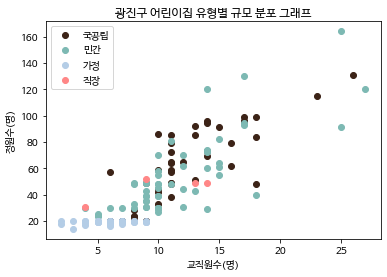

In [ ]:
data=pd.read_csv("/content/광진구_어린이집_교사당아동수.csv", encoding='CP949')

국공립 = data.loc[data['어린이집유형구분'] == '국공립']
민간 = data.loc[data['어린이집유형구분'] == '민간']
가정 = data.loc[data['어린이집유형구분'] == '가정']
직장 = data.loc[data['어린이집유형구분'] == '직장']

plt.scatter(국공립["보육교직원수"],국공립["정원수"],color = '#3C2317', label='국공립')
plt.scatter(민간["보육교직원수"],민간["정원수"],color = '#7DB9B3', label='민간')
plt.scatter(가정["보육교직원수"],가정["정원수"],color = '#B4CDE6', label='가정')
plt.scatter(직장["보육교직원수"],직장["정원수"],color = '#FF8787', label='직장')

plt.title('광진구 어린이집 유형별 규모 분포 그래프')
plt.xlabel('교직원수(명)') #가로축 정보 표시
plt.ylabel('정원수(명)') #세로축 정보 표시
plt.legend()
plt.show()

#4. 시도별 암 발생자

[Text(0, 0, '서울특별시'),
 Text(0, 0, '부산광역시'),
 Text(0, 0, '대구광역시'),
 Text(0, 0, '인천광역시'),
 Text(0, 0, '광주광역시'),
 Text(0, 0, '대전광역시'),
 Text(0, 0, '울산광역시'),
 Text(0, 0, '세종특별자치시'),
 Text(0, 0, '경기도'),
 Text(0, 0, '강원도'),
 Text(0, 0, '충청북도'),
 Text(0, 0, '충청남도'),
 Text(0, 0, '전라북도'),
 Text(0, 0, '전라남도'),
 Text(0, 0, '경상북도'),
 Text(0, 0, '경상남도'),
 Text(0, 0, '제주특별자치도')]

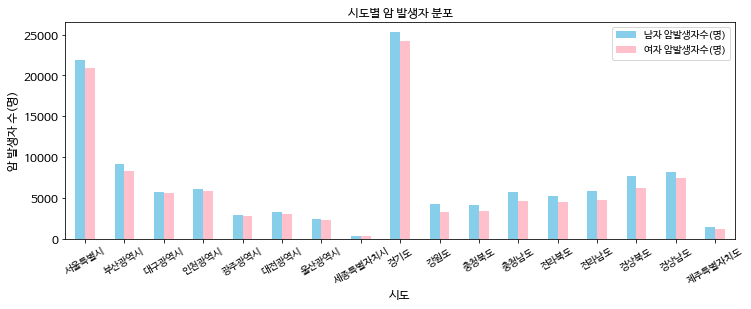

In [ ]:
data=pd.read_csv("/content/보건복지부_시도별 암 발생자 분포_20161231.csv", encoding='CP949')
city=data["시도"]

colors = ['skyblue','pink']
ax = data.plot(kind='bar', title='시도별 암 발생자 분포',figsize=(12,4),legend=True, fontsize=12,color=colors)
ax.set_xlabel('시도', fontsize=12)
ax.set_ylabel('암 발생자 수(명)', fontsize=12)

ax.set_xticklabels(city, fontsize=10,rotation=30)	


#5. 2021년 월별 헌혈 정보

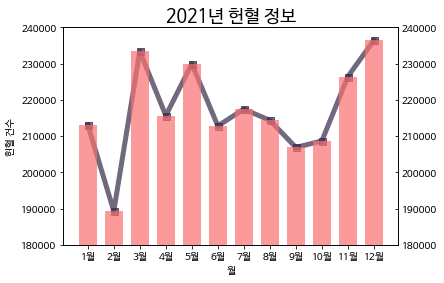

In [ ]:
data=pd.read_csv("/content/대한적십자사_혈액통계정보_20211231.csv", encoding='CP949')
data = data.groupby('월').sum()
data = data.drop(columns='연도별')
data = data.drop(columns='점유율')

x=["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y=data["헌혈건수"]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title('2021년 헌혈 정보', fontsize=18)

ax1.plot(x, y, '-s', color='#372948', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(180000, 240000)
ax1.set_xlabel('월')
ax1.set_ylabel('헌혈 건수')
#ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y, color='#FA7070', alpha=0.7, width=0.7)
ax2.set_ylim(180000, 240000)
ax2.tick_params(axis='y', direction='in')

plt.show()


#6. 서울시 소비자 물가지수

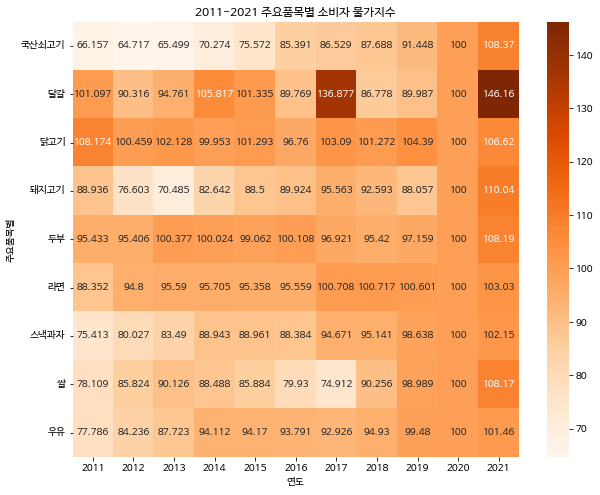

In [100]:
data=pd.read_csv("/content/소비자물가지수(주요품목별)_20221004034119.csv")

import seaborn as sns

df_pivot = pd.pivot_table(data, index=['주요품목별'])

plt.figure(figsize=(10,8))
sns.heatmap(df_pivot, annot=True, cmap='Oranges', fmt='g') # fmt='g': e-notation을 일반표기법으로)
plt.yticks(rotation=0)
plt.title('2011-2021 주요품목별 소비자 물가지수')
plt.xlabel('연도') #가로축 정보 표시

plt.show()
